Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Dataset

In [2]:
# Load dataset
file_path = "diminos_data.csv"
df = pd.read_csv(file_path)

df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


Basic Data Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [4]:
df.isna().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

Convert Date Columns

In [5]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

Calculate Delivery Time (Minutes)

In [6]:
df['delivery_time_min'] = (
    df['order_delivered_at'] - df['order_placed_at']
).dt.total_seconds() / 60

df[['order_id', 'delivery_time_min']].head()

,order_id,delivery_time_min
0,1523111,17.140719
1,1523112,15.598754
2,1523113,15.104856
3,1523114,38.533657
4,1523115,16.176984


Core Business Metrics

In [7]:
mean_delivery_time = df['delivery_time_min'].mean()
p95_delivery_time = df['delivery_time_min'].quantile(0.95)
late_orders_pct = (df['delivery_time_min'] > 31).mean() * 100

mean_delivery_time, p95_delivery_time, late_orders_pct

(np.float64(20.499389326467778),
 np.float64(27.261043996666658),
 np.float64(3.713333333333333))

Service Level Agreement Check

In [8]:
if p95_delivery_time < 31:
    print("✅ SLA MET: 95th percentile is within 31 minutes")
else:
    print("❌ SLA BREACHED: Immediate action required")

✅ SLA MET: 95th percentile is within 31 minutes


Distribution Plot

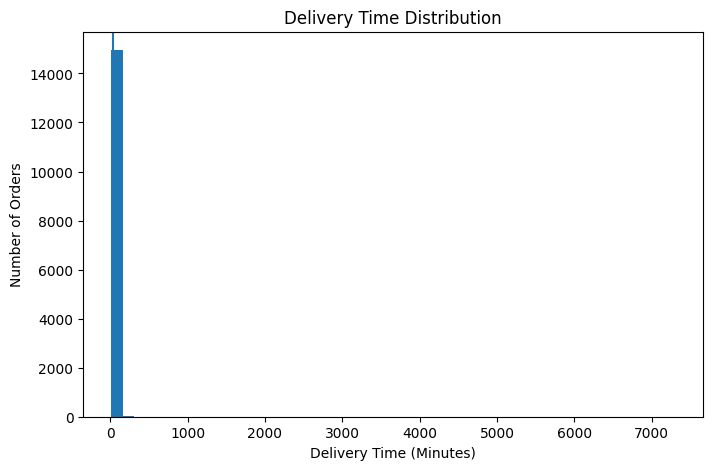

In [9]:
plt.figure(figsize=(8,5))
plt.hist(df['delivery_time_min'], bins=50)
plt.axvline(31)
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Number of Orders")
plt.title("Delivery Time Distribution")
plt.show()

Percentage of Late Orders

In [10]:
total_orders = len(df)
late_orders = df[df['delivery_time_min'] > 31]

print(f"Total Orders: {total_orders}")
print(f"Late Orders (>31 min): {len(late_orders)}")
print(f"Late Order Percentage: {late_orders_pct:.2f}%")

Total Orders: 15000
Late Orders (>31 min): 557
Late Order Percentage: 3.71%


Hour-wise Analysis

In [11]:
df['order_hour'] = df['order_placed_at'].dt.hour

hourly_p95 = df.groupby('order_hour')['delivery_time_min'].quantile(0.95)

hourly_p95

order_hour
0     28.866990
1     32.104821
2     26.845717
3     25.617373
4     26.259762
5     23.924907
6     26.493076
7     27.154475
8     27.207707
9     25.709020
10    26.759252
11    33.407016
12    24.327900
13    29.714826
14    27.891228
15    24.933851
16    32.438371
17    28.260021
18    24.104592
19    26.801610
20    28.237978
21    28.932870
22    24.611743
23    26.943743
Name: delivery_time_min, dtype: float64

Hour-wise P95 Visualization

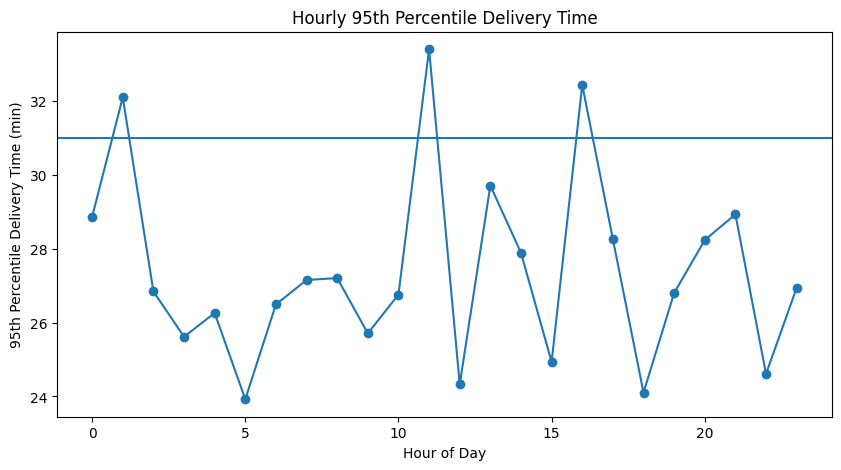

In [12]:
plt.figure(figsize=(10,5))
plt.plot(hourly_p95.index, hourly_p95.values, marker='o')
plt.axhline(31)
plt.xlabel("Hour of Day")
plt.ylabel("95th Percentile Delivery Time (min)")
plt.title("Hourly 95th Percentile Delivery Time")
plt.show()

Orders Crossing Warning Threshold (25 min)

In [13]:
warning_orders_pct = (df['delivery_time_min'] > 25).mean() * 100
warning_orders_pct

np.float64(6.073333333333333)

Business Insights Summary

In [14]:
print("📊 BUSINESS INSIGHTS")
print("-------------------")
print(f"Average Delivery Time: {mean_delivery_time:.2f} minutes")
print(f"95th Percentile Time: {p95_delivery_time:.2f} minutes")
print(f"Orders > 31 min: {late_orders_pct:.2f}%")
print(f"Orders > 25 min (Warning Zone): {warning_orders_pct:.2f}%")

📊 BUSINESS INSIGHTS
-------------------
Average Delivery Time: 20.50 minutes
95th Percentile Time: 27.26 minutes
Orders > 31 min: 3.71%
Orders > 25 min (Warning Zone): 6.07%
